In [91]:
import pandas as pd

df = pd.read_csv('data.csv')
df = df[['Season', 'Weather', 'Sickness']]
dfna = df[df.isna().any(axis=1)]

In [92]:
weather=df['Weather'].unique()

In [93]:
new_rows = []

# Iterate over rows with NaN values
for index, row in dfna.iterrows():
    # Iterate over unique 'Weather' values
    for weth in weather:
        # Create a new dictionary with modified 'Weather'
        new_row = {'Season': row['Season'], 'Weather': weth, 'Sickness': row['Sickness']}
        # Append the new dictionary to the list
        new_rows.append(new_row)

In [98]:
newdf = pd.DataFrame(new_rows)
final = pd.concat([df, newdf])
final = final.dropna()
final = final.reset_index(drop=True)
df = final
len(df)

70

In [99]:
from sklearn.preprocessing import LabelEncoder
le_season = LabelEncoder()
le_weather = LabelEncoder()
le_sickness = LabelEncoder()
df['le_season'] = le_season.fit_transform(df['Season'])
df['le_weather'] = le_weather.fit_transform(df['Weather'])
df['le_sickness'] = le_sickness.fit_transform(df['Sickness'])
df

,Season,Weather,Sickness,le_season,le_weather,le_sickness
0,Dry,Thunderstorm,Asthma,0,4,1
1,Dry,Clouds,Asthma,0,1,1
2,Dry,Clear,Allergies,0,0,0
3,Dry,Clouds,Allergies,0,1,0
4,Dry,Clear,Migraine,0,0,23
...,...,...,...,...,...,...
65,Dry,Thunderstorm,Measles,0,4,21
66,Dry,Clouds,Measles,0,1,21
67,Dry,Clear,Measles,0,0,21
68,Dry,Rain,Measles,0,3,21


In [103]:
f_df = df.drop(['Season', 'Weather', 'Sickness'], axis=1)
f_df.head()

,le_season,le_weather,le_sickness
0,0,4,1
1,0,1,1
2,0,0,0
3,0,1,0
4,0,0,23


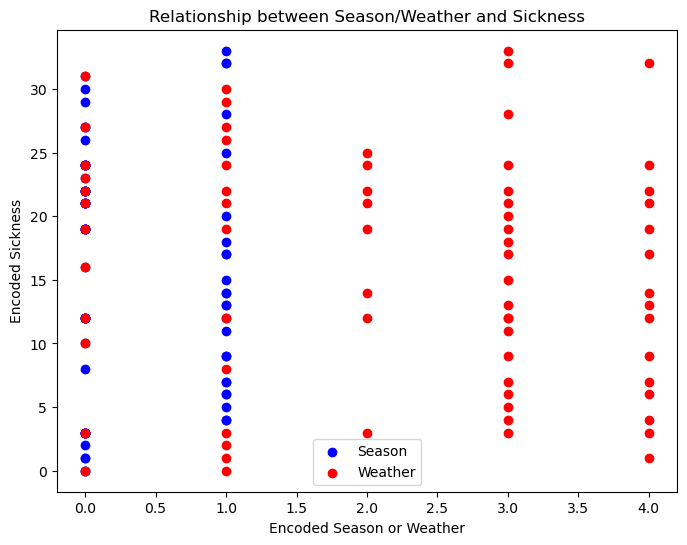

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(f_df['le_season'], f_df['le_sickness'], label='Season', color='b')
plt.scatter(f_df['le_weather'], f_df['le_sickness'], label='Weather', color='r')
plt.xlabel('Encoded Season or Weather')
plt.ylabel('Encoded Sickness')
plt.title('Relationship between Season/Weather and Sickness')
plt.legend()
plt.show()

In [143]:
from sklearn.model_selection import train_test_split
X = f_df.drop('le_sickness', axis=1)
y = f_df['le_sickness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([4, 3, 3, 0, 3, 6, 0, 4, 3, 0, 6, 0, 0, 0])

In [163]:
def pred(params):
    result = model.predict(params)
    result = le_sickness.inverse_transform(result)
    return result

In [166]:
pred([[0,6]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Chicken Pox'], dtype=object)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [194]:
y_prob = model.predict_proba([[0,10]])
labels = le_sickness.classes_
preds = []

for prob in y_prob:
    # Create a list of (class_label, probability) tuples
    class_prob = list(zip(labels, prob))
    
    # Sort the tuples by probability in descending order
    sort_prob = sorted(class_prob, key=lambda x: x[1], reverse=True)
    top_10_classes = [label for label, _ in sort_prob[:10]]
    preds.append(top_10_classes)

import numpy as np
preds = np.array(preds)

for i in range(min(5, len(preds))):  # Display for the first 5 instances
    print(f"Instance {i + 1}: {preds[i]}")

Instance 1: ['Chicken Pox' 'Contact Rashes' 'Influenza' 'Low Energy' 'Measles'
 'Allergies' 'Asthma' 'Bronchitis' 'Chikungunya' 'Cholera']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
